<a href="https://colab.research.google.com/github/r-prateek/Indian-Currency-Notes-Classifier/blob/main/Currency_Resnet_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Dataset from Kaggle**

In [ ]:
! pip install --upgrade --force-reinstall --no-deps kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
! kaggle datasets download -d vishalmane109/indian-currency-note-images-dataset-2020
! unzip indian-currency-note-images-dataset-2020.zip -d dataset

#**Import required libraries**


Libraries used:
```
tensorflow
matplotlib
```

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

# **Data Augmentation**

In [3]:
train_path = "/content/dataset/Indian currency dataset v1/training"
test_path = "/content/dataset/Indian currency dataset v1/validation"

In [4]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 5,
    #zoom_range = 0.1,
    horizontal_flip = True,
    vertical_flip = True,
    #brightness_range = (3,8)
)

In [5]:
train_data = datagen.flow_from_directory(
    train_path,
    target_size = (50, 50),
    color_mode = 'rgb',
    batch_size = 32,
    shuffle = True,
    seed = 865
)

Found 3566 images belonging to 8 classes.


In [6]:
test_data = datagen.flow_from_directory(
    test_path,
    target_size = (50, 50),
    color_mode = 'rgb',
    batch_size = 32,
    shuffle = True,
    seed = 865
)

Found 345 images belonging to 8 classes.


# **Using pretrained model Resnet50V2**

* Using model trained on *imagenet* dataset
* Resizing input shape to 50 x 50

In [7]:
resnet = tf.keras.applications.ResNet50V2(
    include_top = False,
    weights = 'imagenet',
    input_shape = (50, 50, 3)
)

94674944/94668760 [==============================] - 1s 0us/step


In [ ]:
resnet.trainable = False 
resnet.summary()

# **Creating model required**

Features of the model:

* Model has pretrained model for feature extraction
* Uses GlobalMaxPooling2D
* Artificial Deep Neural Network uses 3 Dense hidden layers with activations ReLu, and an output layer with activation 'Softmax'


In [9]:
model = tf.keras.Sequential()

In [10]:
model.add(resnet)
model.add(tf.keras.layers.GlobalMaxPool2D())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1024, activation='relu'))
# model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
# model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50v2 (Functional)      (None, 2, 2, 2048)        23564800  
_________________________________________________________________
global_max_pooling2d (Global (None, 2048)              0         
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              2098176   
_________________________________________________________________
dense_1 (Dense)              (None, 256)               262400    
_________________________________________________________________
dense_2 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 5

> Using *Adam* as the optimizer and loss fucnction as categorical CrossEntropy

In [12]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

> Training the model with validation data, for 40 epochs

In [14]:
history = model.fit(train_data, validation_data=test_data, epochs = 40)

Epoch 1/40
112/112 [==============================] - ETA: 0s - loss: 2.0043 - accuracy: 0.2333

/usr/local/lib/python3.7/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


112/112 [==============================] - 261s 2s/step - loss: 2.0043 - accuracy: 0.2333 - val_loss: 1.8814 - val_accuracy: 0.2870
Epoch 2/40
112/112 [==============================] - 256s 2s/step - loss: 1.8229 - accuracy: 0.3121 - val_loss: 1.7613 - val_accuracy: 0.3362
Epoch 3/40
112/112 [==============================] - 255s 2s/step - loss: 1.7158 - accuracy: 0.3623 - val_loss: 1.6282 - val_accuracy: 0.3942
Epoch 4/40
112/112 [==============================] - 254s 2s/step - loss: 1.6635 - accuracy: 0.3828 - val_loss: 1.5316 - val_accuracy: 0.4522
Epoch 5/40
112/112 [==============================] - 252s 2s/step - loss: 1.6011 - accuracy: 0.4117 - val_loss: 1.5396 - val_accuracy: 0.4406
Epoch 6/40
112/112 [==============================] - 253s 2s/step - loss: 1.5505 - accuracy: 0.4302 - val_loss: 1.5161 - val_accuracy: 0.4551
Epoch 7/40
112/112 [==============================] - 253s 2s/step - loss: 1.4925 - accuracy: 0.4391 - val_loss: 1.4100 - val_accuracy: 0.5072
Epoch 8/40

# **Plotting Graphs**

> Using ```matplotlib.pyplot```
* Plotting graph of Accuracy vs Validation Accuracy for each epoch.
* Plotting graph of Loss vs Validation Loss for each epoch

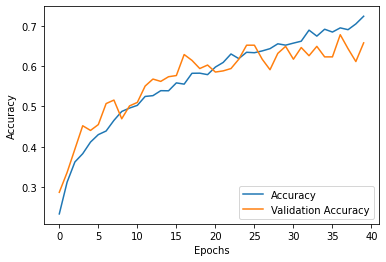

In [15]:
plt.plot(history.history['accuracy'], label = 'Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc = "lower right")

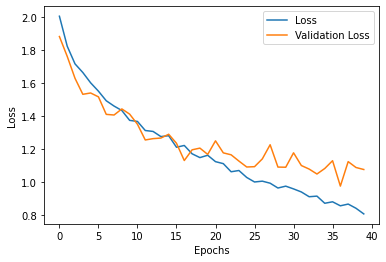

In [16]:
plt.plot(history.history['loss'], label = 'Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc = "upper right")